In [83]:
import pandas as pd
import sklearn
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
df = pd.read_csv("df_times_cleaned.csv")

clean_df = df.drop(columns=['CAPACITY', 'END_HOURS_CONC_POUR_MON_SAT', 'END_HOURS_NEAR_HOME_FRI_SAT','END_HOURS_NEAR_HOME_SUN_THUR', 
                            'END_HOURS_NOT_NEAR_HOME', 'OMV_FRI_END_TIME','OMV_FRI_START_TIME', 'OMV_MON_END_TIME', 'OMV_MON_START_TIME',
                            'OMV_SAT_END_TIME', 'OMV_SAT_START_TIME', 'OMV_SUN_END_TIME','OMV_SUN_START_TIME', 'OMV_THU_END_TIME', 
                            'OMV_THU_START_TIME','OMV_TUE_END_TIME', 'DECIBEL_LEVEL','OMV_TUE_START_TIME','OMV_WED_END_TIME','OMV_WED_START_TIME',
                            'SQUARE_FOOTAGE','START_HOURS_CONC_POUR_MON_SAT','START_HOURS_NEAR_HOME_FRI_SAT','START_HOURS_NEAR_HOME_SUN_THUR',
                            'START_HOURS_NOT_NEAR_HOME', 'STATUS', 'EXPIRATION_DATE', 'EVENT_MONTH',
                             'in_year', 'in_mon', 'issue_mon', 'issue_year', 'ISSUED_BY', 'START_DATE'])#, 'STREET_ADDRESS']) # data leakage
#clean_df['EXPIRATION_DATE'].value_counts()
# 1. Define your target and features
#X = df.drop(columns=['time_diff'])  # features
#y = df['time_diff']  # target
top_10_streets = clean_df['STREET_ADDRESS'].value_counts().head(10).index

clean_df['Popular_Street_Address'] = clean_df['STREET_ADDRESS'].isin(top_10_streets)
clean_df = clean_df.drop(columns=['STREET_ADDRESS'])
clean_df['REST_51_PERCENT_FOOD_SALES'] = clean_df['REST_51_PERCENT_FOOD_SALES'].fillna('No')
clean_df['MULTIPLE_START_DATES'] = clean_df['MULTIPLE_START_DATES'].fillna('False')
clean_df.describe()

,EVENT_YEAR,ZIPCODE,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,time_diff
count,6023.000000,6023.000000,6023.000000,6023.000000,6023.000000,6023.00000
mean,2017.390005,78704.685373,30.268764,-97.742098,8.165034,19.55838
std,4.273506,13.243716,0.028834,0.015964,2.087665,55.84685
min,2009.000000,78613.000000,30.133489,-97.891292,1.000000,0.00000
25%,2014.000000,78701.000000,30.261654,-97.747996,9.000000,0.00000
50%,2017.000000,78701.000000,30.266050,-97.741806,9.000000,0.00000
75%,2021.000000,78702.000000,30.268718,-97.738584,9.000000,23.50000
max,2025.000000,78759.000000,30.497375,-97.623960,10.000000,1026.00000


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

numeric_features = ['EVENT_YEAR', 'LATITUDE', 'LONGITUDE']
categorical_features = ['ZIPCODE', 'COUNCIL_DISTRICT', 'MULTIPLE_START_DATES', 'SUB_TYPE', 'REST_51_PERCENT_FOOD_SALES', 'AMPLIFIED_SOUND_DISTRICT']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


clean_df.describe()

,EVENT_YEAR,ZIPCODE,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,time_diff
count,6023.000000,6023.000000,6023.000000,6023.000000,6023.000000,6023.00000
mean,2017.390005,78704.685373,30.268764,-97.742098,8.165034,19.55838
std,4.273506,13.243716,0.028834,0.015964,2.087665,55.84685
min,2009.000000,78613.000000,30.133489,-97.891292,1.000000,0.00000
25%,2014.000000,78701.000000,30.261654,-97.747996,9.000000,0.00000
50%,2017.000000,78701.000000,30.266050,-97.741806,9.000000,0.00000
75%,2021.000000,78702.000000,30.268718,-97.738584,9.000000,23.50000
max,2025.000000,78759.000000,30.497375,-97.623960,10.000000,1026.00000


In [86]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

X = clean_df.drop(columns='time_diff')
X_train, X_test, y_train, y_test = train_test_split(X, df['time_diff'], test_size=0.2, random_state=42)

# ---------- STEP 6: Fit the Model ----------
model.fit(X_train, y_train)

# ---------- STEP 7: Evaluate ----------
y_pred = model.predict(X_test)

print("R² score:", r2_score(y_test, y_pred))
print("Overall RMSE:", root_mean_squared_error(y_test, y_pred))


R² score: 0.2761149629357238
Overall RMSE: 49.897403252173845


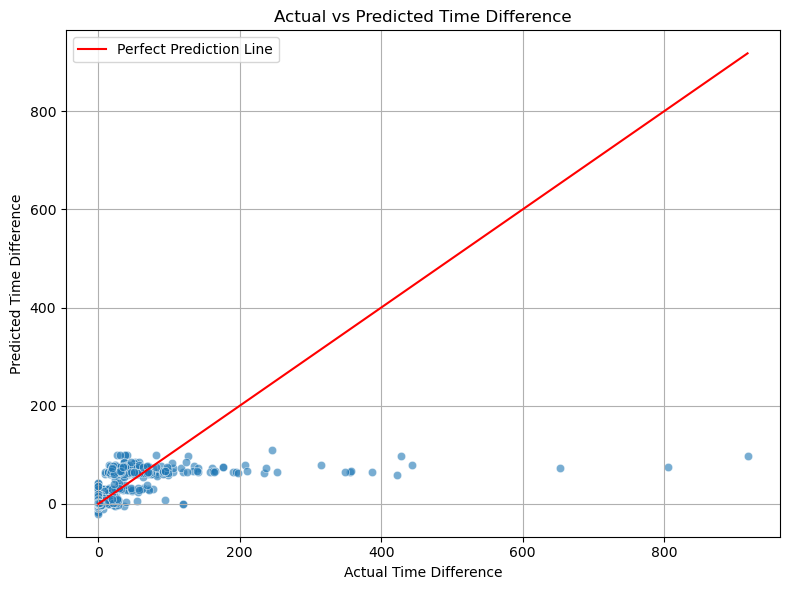

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Prediction Line')

plt.xlabel('Actual Time Difference')
plt.ylabel('Predicted Time Difference')
plt.title('Actual vs Predicted Time Difference')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [88]:
# Get components
preprocessor = model.named_steps['preprocessor']
regressor = model.named_steps['regressor']

# Get feature names
num_features = numeric_features
cat_transformer = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_features = cat_transformer.get_feature_names_out(categorical_features)

all_feature_names = num_features + list(cat_features)

# Get coefficients
coefs = regressor.coef_

# Combine into DataFrame
import numpy as np
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefs,
    'Abs_Coefficient': np.abs(coefs)
}).sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance.head(15))


                         Feature  Coefficient  Abs_Coefficient
57  SUB_TYPE_Outdoor Music Venue    48.869843        48.869843
5                  ZIPCODE_78660   -44.305853        44.305853
23                 ZIPCODE_78732   -42.816247        42.816247
40                 ZIPCODE_78758    37.462024        37.462024
21                 ZIPCODE_78730   -33.584318        33.584318
25                 ZIPCODE_78741    21.983007        21.983007
17                 ZIPCODE_78726   -21.772450        21.772450
3                  ZIPCODE_78613   -20.860057        20.860057
12                 ZIPCODE_78717   -17.448373        17.448373
20                 ZIPCODE_78729   -16.663994        16.663994
14                 ZIPCODE_78722    15.837553        15.837553
7                  ZIPCODE_78702    14.726490        14.726490
31                 ZIPCODE_78748    14.353618        14.353618
33                 ZIPCODE_78750   -13.485901        13.485901
4                  ZIPCODE_78617    13.429904        13

C:\Users\nneom\AppData\Local\Temp\ipykernel_5060\1711602356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Abs_Coefficient', y='Feature', data=top_features, palette='viridis')


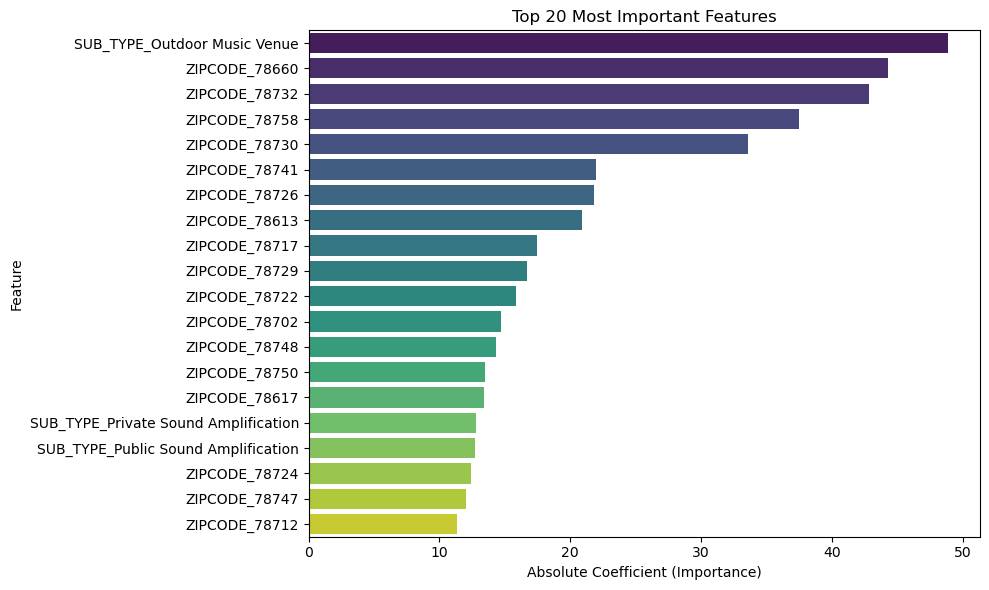

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 20  # you can change this number
top_features = feature_importance.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=top_features, palette='viridis')
plt.title(f'Top {top_n} Most Important Features')
plt.xlabel('Absolute Coefficient (Importance)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


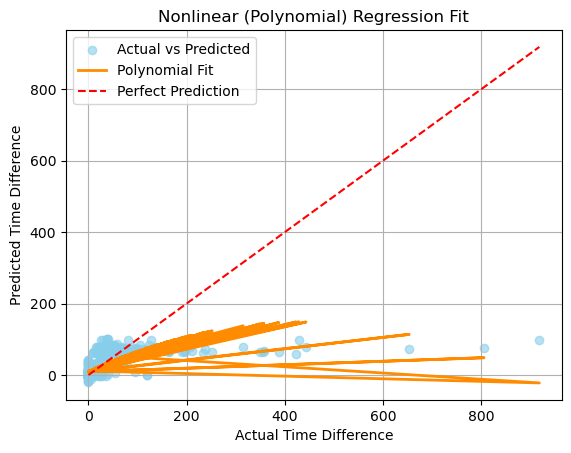

MSE: 20.586441428599716
R²: 0.49263470117485486


In [ ]:
# NON LINEAR REGRESSION
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Example: Replace these with your actual data
# X = actual time difference
# y = predicted time difference
X = y_test.to_numpy().reshape(-1, 1)
y = y_pred

# Create polynomial features (try degree=2 or 3 to start)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plot the results
plt.scatter(X, y, color='skyblue', alpha=0.6, label='Actual vs Predicted')
plt.plot(X, y_pred, color='darkorange', linewidth=2, label='Polynomial Fit')
plt.plot([X.min(), X.max()], [X.min(), X.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Time Difference")
plt.ylabel("Predicted Time Difference")
plt.title("Nonlinear (Polynomial) Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

# Optional: Model performance
print("RMSE:", root_mean_squared_error(y, y_pred))
print("R²:", r2_score(y, y_pred))



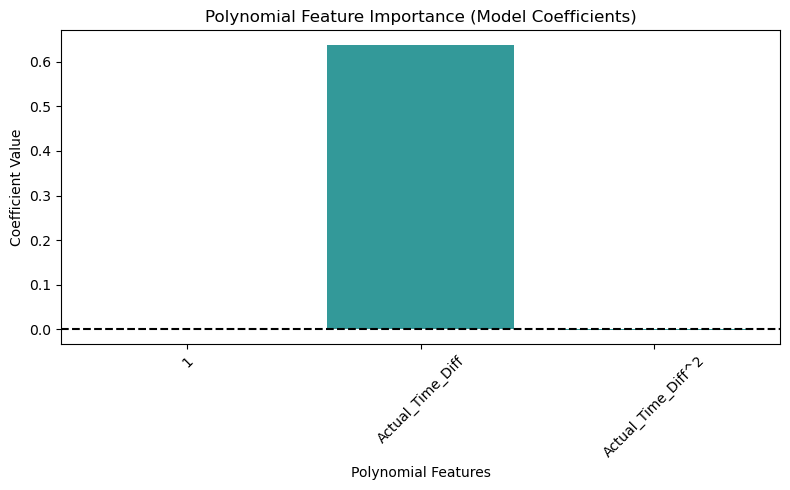

In [ ]:
feature_names = poly.get_feature_names_out(['Actual_Time_Diff'])

# Get coefficients from the model
coefficients = model.coef_

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.bar(feature_names, coefficients, color='teal', alpha=0.8)
plt.axhline(0, color='black', linestyle='--')
plt.title('Polynomial Feature Importance (Model Coefficients)')
plt.xlabel('Polynomial Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# capacity
'''

'''
cap_df = df[~df['CAPACITY'].isna()]
cap_df = cap_df.drop(columns=['END_HOURS_CONC_POUR_MON_SAT','END_HOURS_NEAR_HOME_FRI_SAT','END_HOURS_NEAR_HOME_SUN_THUR', 'END_HOURS_NOT_NEAR_HOME',
                              'START_HOURS_NEAR_HOME_FRI_SAT', 'START_HOURS_NEAR_HOME_SUN_THUR' ,'START_HOURS_NOT_NEAR_HOME', 'START_HOURS_CONC_POUR_MON_SAT',
                              'in_mon', 'issue_mon', 'in_year', 'issue_year'])

omv_time_cols = [
    'OMV_FRI_END_TIME', 'OMV_FRI_START_TIME',
    'OMV_MON_END_TIME', 'OMV_MON_START_TIME',
    'OMV_SAT_END_TIME', 'OMV_SAT_START_TIME',
    'OMV_SUN_END_TIME', 'OMV_SUN_START_TIME',
    'OMV_THU_END_TIME', 'OMV_THU_START_TIME',
    'OMV_TUE_END_TIME', 'OMV_TUE_START_TIME',
    'OMV_WED_END_TIME', 'OMV_WED_START_TIME'
]

for col in omv_time_cols:
    df[col] = df[col].fillna(df[col].median())


# cap_df['DECIBEL_LEVEL']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

numeric_features = ['EVENT_YEAR', 'LATITUDE', 'LONGITUDE', 'OMV_FRI_END_TIME', 'OMV_FRI_START_TIME',
    'OMV_MON_END_TIME', 'OMV_MON_START_TIME',
    'OMV_SAT_END_TIME', 'OMV_SAT_START_TIME',
    'OMV_SUN_END_TIME', 'OMV_SUN_START_TIME',
    'OMV_THU_END_TIME', 'OMV_THU_START_TIME',
    'OMV_TUE_END_TIME', 'OMV_TUE_START_TIME',
    'OMV_WED_END_TIME', 'OMV_WED_START_TIME', 'SQUARE_FOOTAGE', 'DECIBEL_LEVEL']
categorical_features = ['ZIPCODE', 'COUNCIL_DISTRICT', 'MULTIPLE_START_DATES', 'SUB_TYPE', 'REST_51_PERCENT_FOOD_SALES', 'AMPLIFIED_SOUND_DISTRICT']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])



In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

X_cap = cap_df.drop(columns=['time_diff'])
X_train_cap, X_test_cap, y_train_cap, y_test_cap = train_test_split(X_cap, cap_df['time_diff'], test_size=0.2, random_state=42)

# ---------- STEP 6: Fit the Model ----------
model.fit(X_train_cap, y_train_cap)

# ---------- STEP 7: Evaluate ----------
y_pred_cap = model.predict(X_test_cap)

print("R² score:", r2_score(y_test_cap, y_pred_cap))
print("Overall RMSE:", root_mean_squared_error(y_test_cap, y_pred_cap))


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values